<a href="https://colab.research.google.com/github/AriwodolaWuraola/customers-data-set/blob/main/Project_By_Ariwodola_Wuraola_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import neccesary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [4]:
df = pd.read_csv('customers data set.csv')

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   CustomerKey Prefix  FirstName LastName              Unnamed: 4 Unnamed: 5  \
0        11000    MR.        JON     YANG            MR. JON YANG       YANG   
1        11001    MR.     EUGENE    HUANG        MR. EUGENE HUANG      HUANG   
2        11002    MR.      RUBEN   TORRES        MR. RUBEN TORRES     TORRES   
3        11003    MS.    CHRISTY      ZHU         MS. CHRISTY ZHU        ZHU   
4        11004   MRS.  ELIZABETH  JOHNSON  MRS. ELIZABETH JOHNSON    JOHNSON   

  Unnamed: 6   BirthDate  Unnamed: 8 MaritalStatus Gender  \
0       YANG    4/8/1966         NaN             M      M   
1      HUANG  14/05/1965         NaN             S      M   
2     TORRES   8/12/1965         NaN             M      M   
3        ZHU  15/02/1968         NaN             S      F   
4    JOHNSON    8/8/1968         NaN             S      F   

                 EmailAddress AnnualIncome  TotalChildren EducationLevel  \
0       jon24@learnsector.com     $90,000    

Cleaning the dataset

In [6]:
#Name unnamed column
#replace column 4 with a new name
current_columns = df.columns.tolist()
current_columns[4] = 'Full name'
# Assign the modified column names back to the DataFrame
df.columns = current_columns

In [7]:
#delete columns that are not needed,i.e repeated columns, empty columns etc.
columns_to_drop = [5, 6, 8, 17, 18, 19]
df = df.drop(df.columns[columns_to_drop], axis=1)

In [8]:
#checking my dataset
print(df)

      CustomerKey Prefix  FirstName   LastName               Full name  \
0           11000    MR.        JON       YANG            MR. JON YANG   
1           11001    MR.     EUGENE      HUANG        MR. EUGENE HUANG   
2           11002    MR.      RUBEN     TORRES        MR. RUBEN TORRES   
3           11003    MS.    CHRISTY        ZHU         MS. CHRISTY ZHU   
4           11004   MRS.  ELIZABETH    JOHNSON  MRS. ELIZABETH JOHNSON   
...           ...    ...        ...        ...                     ...   
7817        18971    MR.      WYATT      MOORE         MR. WYATT MOORE   
7818        18972    MR.   BENJAMIN     BUTLER     MR. BENJAMIN BUTLER   
7819        18973   MRS.       KATE       YUAN          MRS. KATE YUAN   
7820        18974    MR.      JAMES  RODRIGUEZ     MR. JAMES RODRIGUEZ   
7821        18975    MR.     SAMUEL        BRY                     NaN   

       BirthDate MaritalStatus Gender                EmailAddress  \
0       4/8/1966             M      M     

1st Task

In [9]:
#Create a bar chart showing the count of customers by MaritalStatus.


# Use value_counts() to get the count of each marital status category
marital_status_counts = df['MaritalStatus'].value_counts()

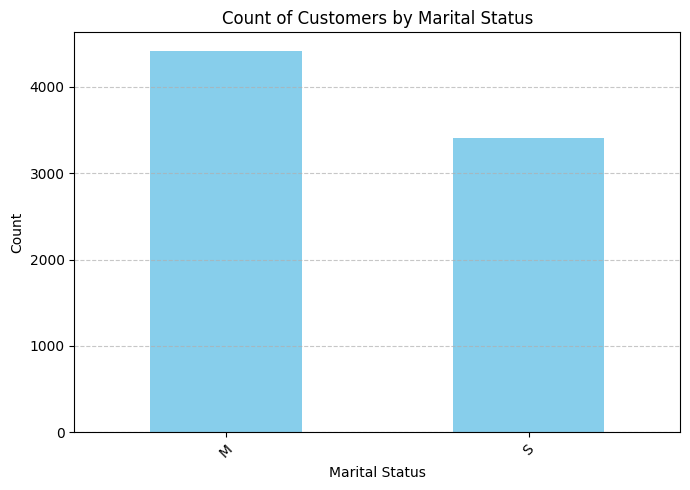

In [10]:
# Plot the counts using a bar chart
plt.figure(figsize=(7, 5))
marital_status_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Customers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2nd Task

In [11]:
#Visualize the proportion of customers by Gender

# Calculate the proportion of customers by gender
gender_proportion = df['Gender'].value_counts(normalize=True)

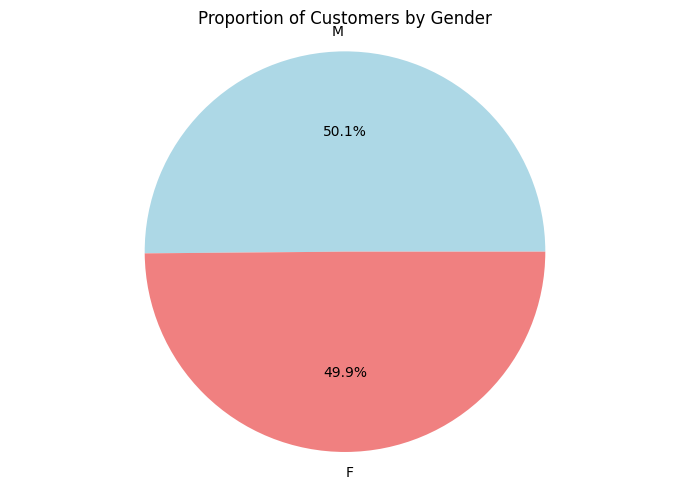

In [12]:
#Plot the pie chart
plt.figure(figsize=(7, 5))
plt.pie(gender_proportion, labels=gender_proportion.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Customers by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

3rd Task

In [13]:
#Generate a histogram of AnnualIncome to examine its distribution (Note: Convert AnnualIncome to a numeric format first).
# Convert 'AnnualIncome' to numeric format
df['AnnualIncome'] = pd.to_numeric(df['AnnualIncome'], errors='coerce')



In [14]:
# Remove special characters and convert to numeric format
df['AnnualIncome'] = df['AnnualIncome'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
#identify problematic values
print(df['AnnualIncome'].unique())


[nan]


In [16]:
df['AnnualIncome'].fillna(0, inplace=True)


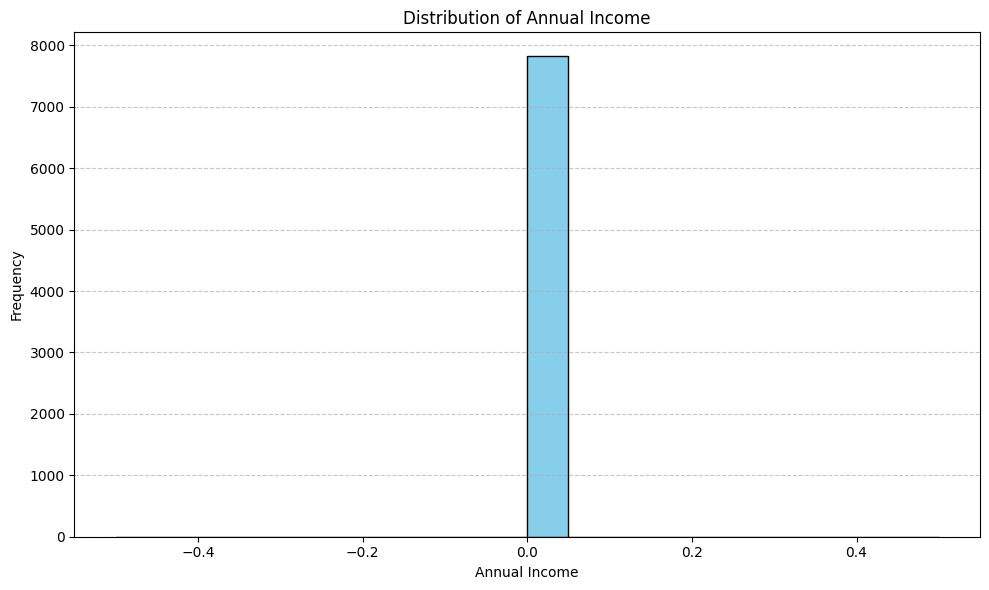

In [17]:
#Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['AnnualIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4th Task

In [18]:
#Create a column chart displaying the average number of TotalChildren for each EducationLevel

# Group the data by EducationLevel and calculate the average number of TotalChildren
avg_total_children = df.groupby('EducationLevel')['TotalChildren'].mean().reset_index()



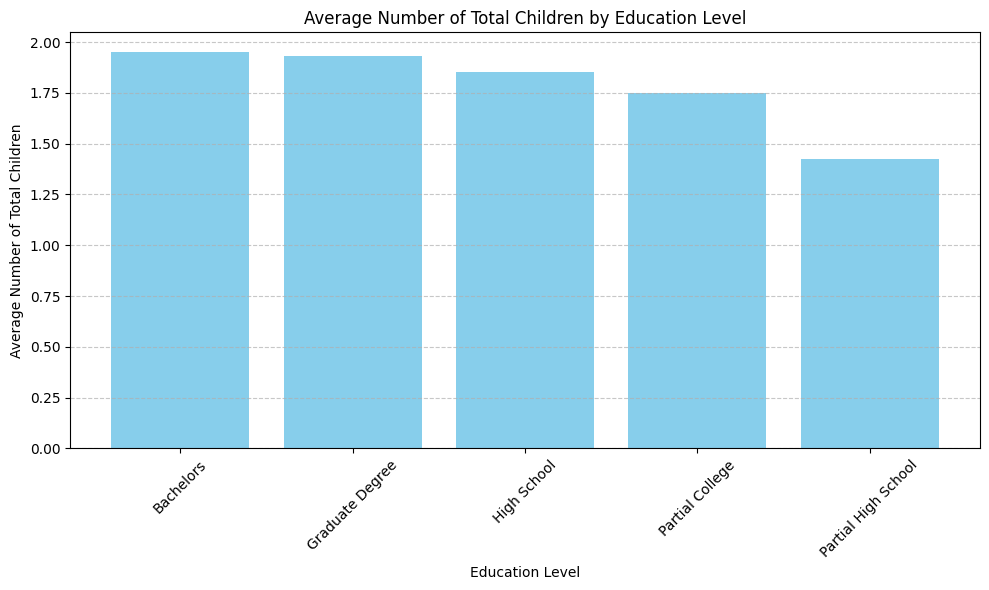

In [19]:
# Plot the column chart
plt.figure(figsize=(10, 6))
plt.bar(avg_total_children['EducationLevel'], avg_total_children['TotalChildren'], color='skyblue')
plt.title('Average Number of Total Children by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Number of Total Children')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5th Task

In [20]:
#Use a bar chart to compare the average AnnualIncome across different Occupation categories.

# Remove special characters and convert to numeric format
df['AnnualIncome'] = df['AnnualIncome'].replace('[\$,]', '', regex=True).astype(float)

In [22]:
# Replace NaN values in 'AnnualIncome' column with 0
df['AnnualIncome'].fillna(0, inplace=True)


In [23]:
# Group the data by Occupation and calculate the average AnnualIncome
avg_income_by_occupation = df.groupby('Occupation')['AnnualIncome'].mean()


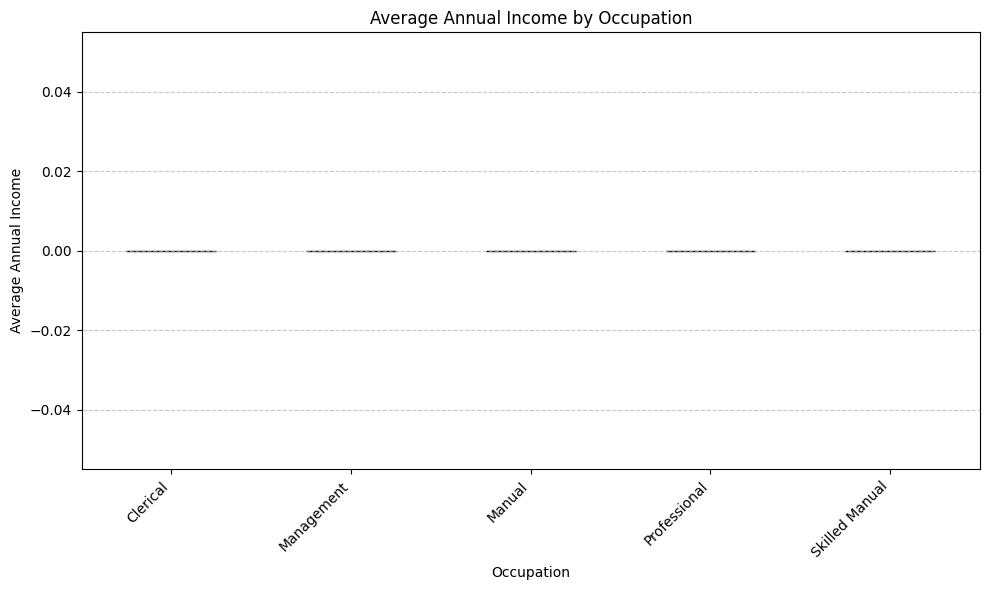

In [24]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_income_by_occupation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Annual Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
print(df['AnnualIncome'].unique())


[0.]


6th Task

In [27]:
#Visualize the count of customers in each Occupation category using a pie chart.

#Group the data by 'Occupation' and count the number of customers in each category
occupation_counts = df['Occupation'].value_counts()



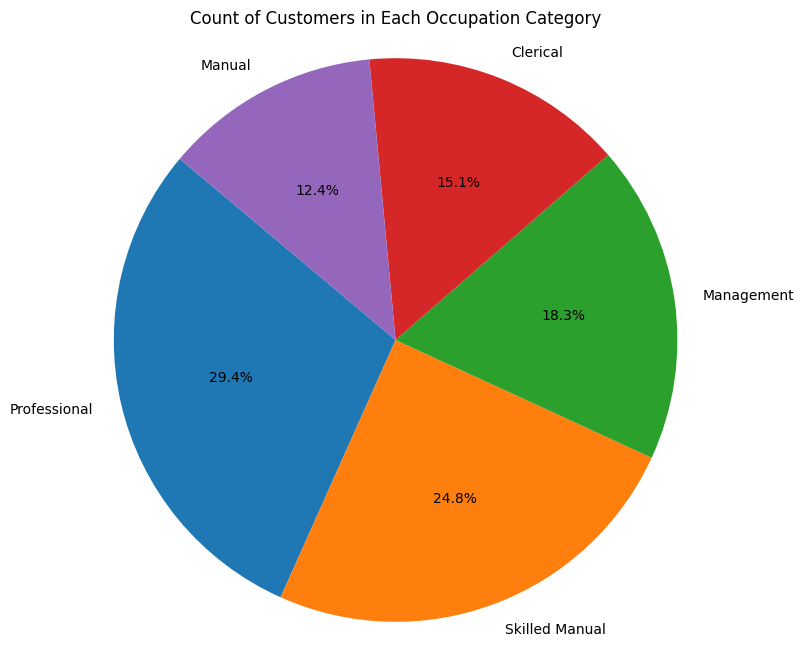

In [28]:
#plot the counts using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Customers in Each Occupation Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

7th Task

In [33]:
#Generate a histogram to explore the age distribution of customers (Age needs to be derived from BirthDate)

## Convert 'BirthDate' to datetime format with explicit date format
df['BirthDate'] = pd.to_datetime(df['BirthDate'], format='%m/%d/%Y')


In [34]:
# Import the datetime module
from datetime import datetime  # Import the datetime module



In [35]:
# Calculate age based on 'BirthDate' column
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).astype('<m8[Y]')


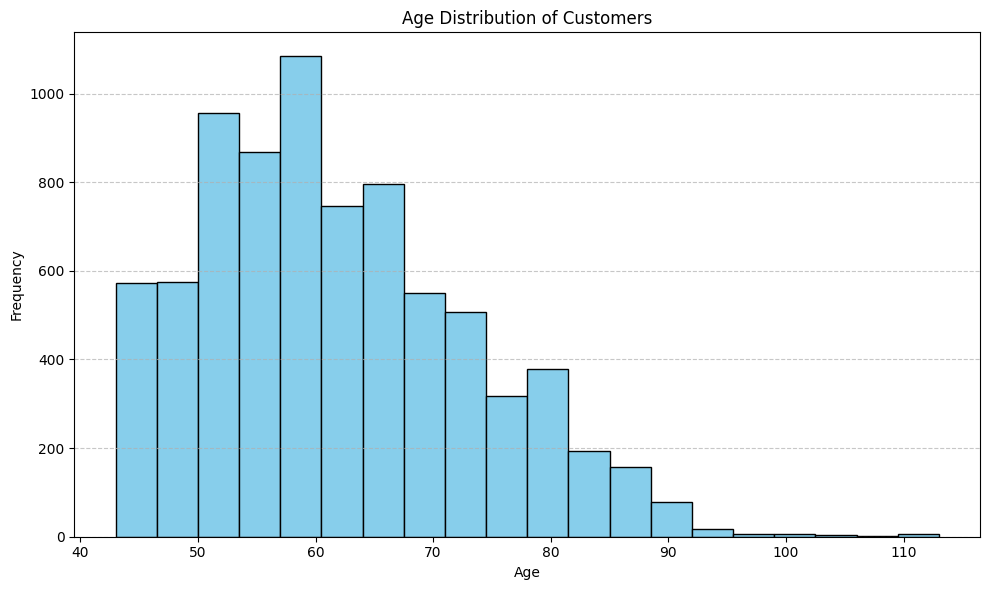

In [36]:
# Plot the histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8th Task

In [37]:
#Plot a line chart to show changes in the average AnnualIncome over different age groups.

#Define age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']


In [38]:
#Group the data by age groups and calculate the average AnnualIncome for each group
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
average_income_by_age_group = df.groupby('AgeGroup')['AnnualIncome'].mean()


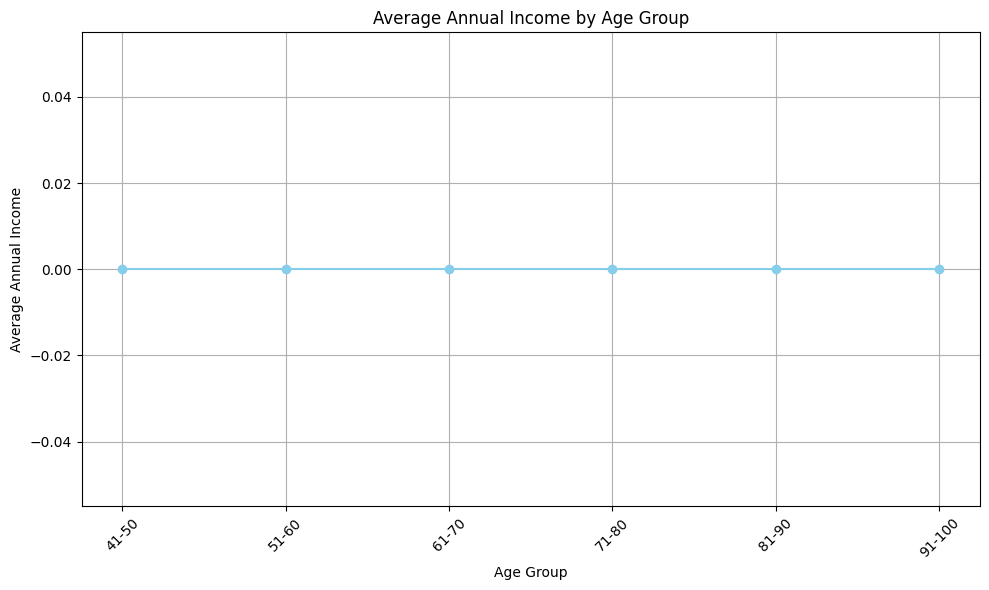

In [39]:
#Plot the line chart
plt.figure(figsize=(10, 6))
average_income_by_age_group.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Annual Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

9th Task

In [40]:
#Create a bar chart that shows the number of homeowners vs. non-homeowners (HomeOwner status).

#Count the number of occurrences of each 'HomeOwner' status
homeowner_counts = df['HomeOwner'].value_counts()


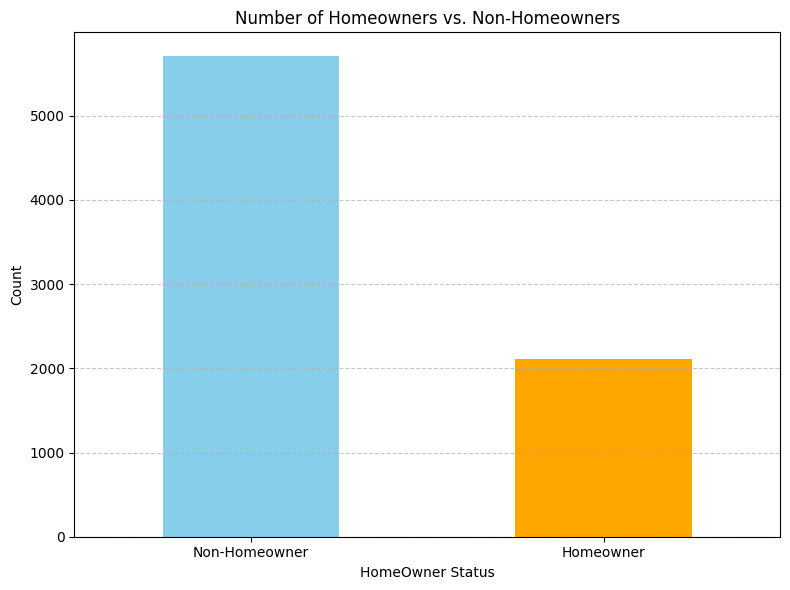

In [42]:
#Plot the counts using a bar chart
plt.figure(figsize=(8, 6))
homeowner_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Homeowners vs. Non-Homeowners')
plt.xlabel('HomeOwner Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate the x-axis labels
plt.xticks(ticks=[0, 1], labels=['Non-Homeowner', 'Homeowner'])  # Set custom labels for the ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

10th Task

In [43]:
#Use a column chart to display the total number of customers by EducationLevel.

# Count the number of customers for each EducationLevel
education_counts = df['EducationLevel'].value_counts()


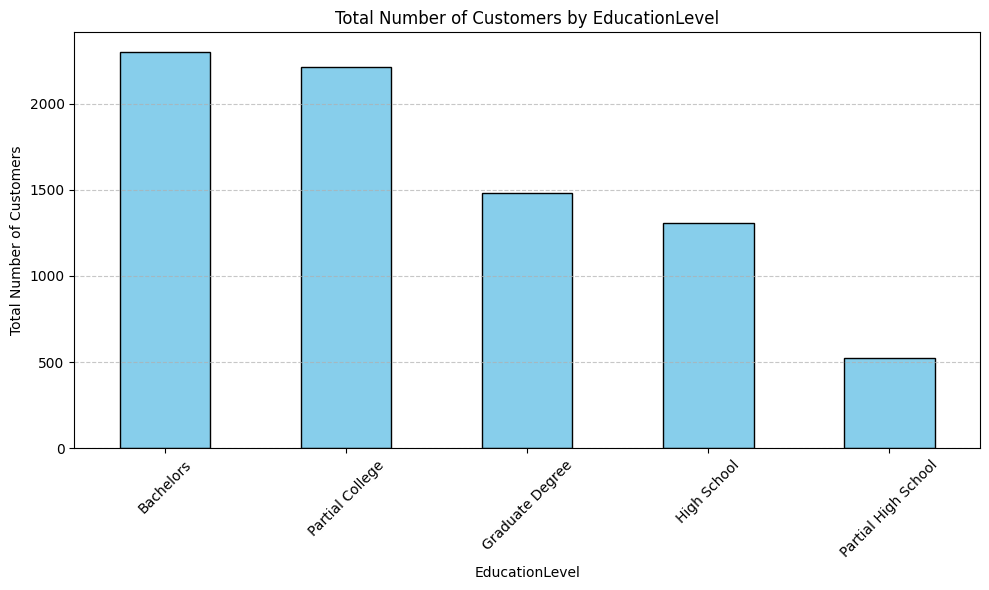

In [44]:
#Plot the counts using a column chart
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Number of Customers by EducationLevel')
plt.xlabel('EducationLevel')
plt.ylabel('Total Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

11th Task

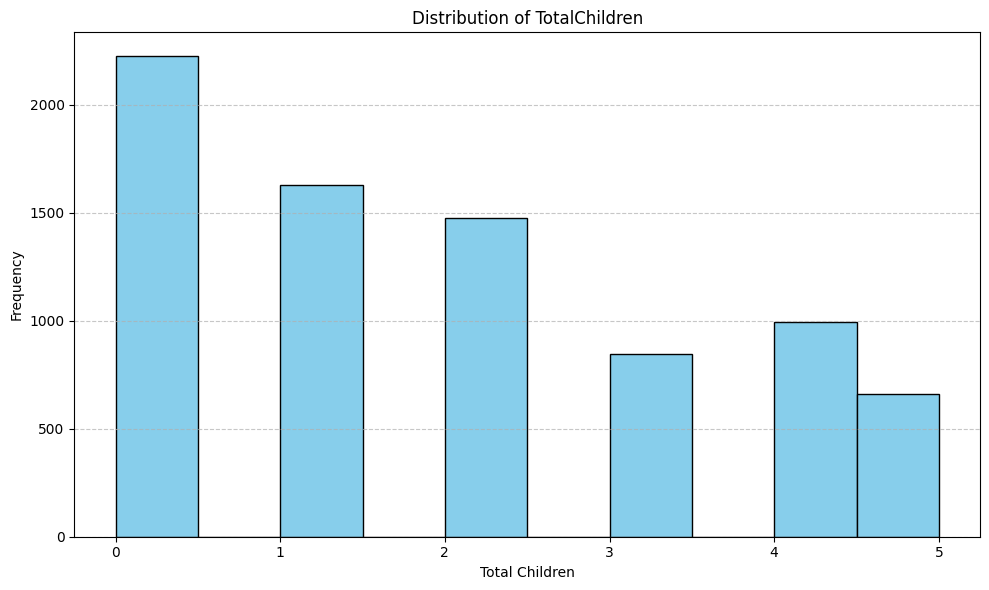

In [45]:
#Visualize the distribution of TotalChildren using a histogram.

# Plot the histogram of TotalChildren
plt.figure(figsize=(10, 6))
plt.hist(df['TotalChildren'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of TotalChildren')
plt.xlabel('Total Children')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

12th Task

In [50]:
#Create a pie chart showing the proportion of different MaritalStatus categories within a specific Occupation.

#Specify the Occupation for which i want to create the pie chart
specific_occupation = 'Management'


In [51]:
#Filter the DataFrame for the specific Occupation
occupation_df = df[df['Occupation'] == specific_occupation]


In [52]:
#Count the occurrences of each MaritalStatus category within the filtered DataFrame
marital_status_counts = occupation_df['MaritalStatus'].value_counts()


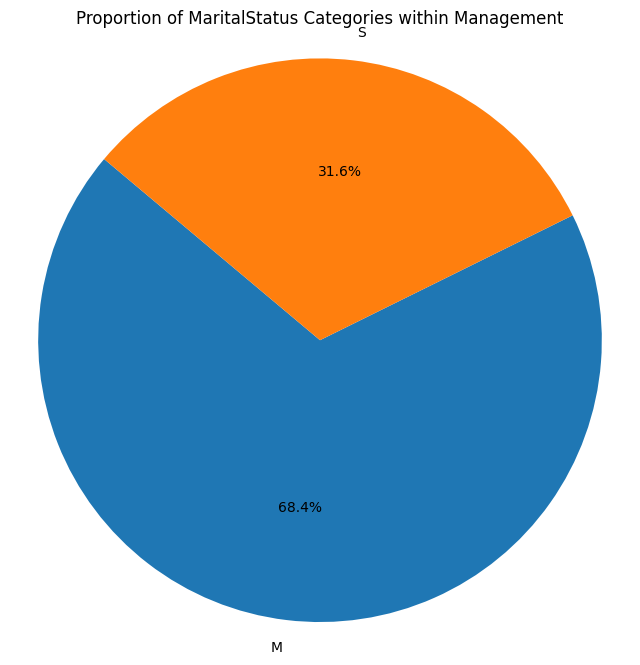

In [53]:
#Plot the counts using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of MaritalStatus Categories within ' + specific_occupation)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

13th Task

In [54]:
#Plot a bar chart comparing the count of male vs. female customers in each EducationLevel.

# Group the data by 'EducationLevel' and 'Gender', and count the number of customers in each group
gender_counts = df.groupby(['EducationLevel', 'Gender']).size().unstack()


<Figure size 1000x600 with 0 Axes>

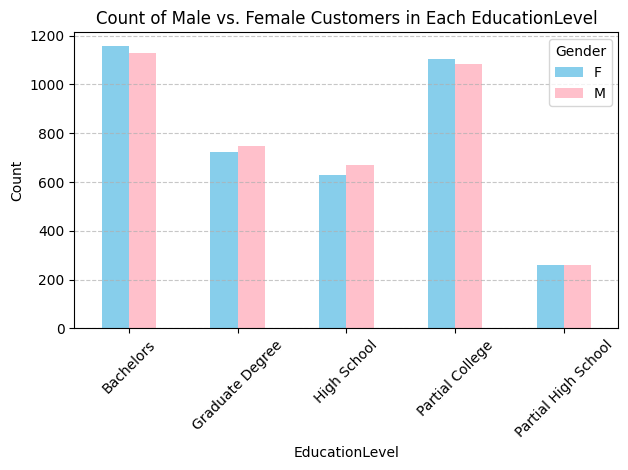

In [55]:
# Plot the counts using a bar chart
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', stacked=False, color=['skyblue', 'pink'])
plt.title('Count of Male vs. Female Customers in Each EducationLevel')
plt.xlabel('EducationLevel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

14th Task

In [56]:
#Use a line chart to depict the average number of TotalChildren across different income ranges.

# Convert 'AnnualIncome' to numeric format (remove '$' and ',' symbols)
df['AnnualIncome'] = df['AnnualIncome'].replace('[\$,]', '', regex=True).astype(float)



In [57]:
# Define income ranges or bins
income_bins = [0, 50000, 75000, 100000, 125000, 150000, 200000, float('inf')]
income_labels = ['<50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k', '150k-200k', '>200k']


In [58]:
# Group the data by income ranges and calculate the average number of TotalChildren for each income range
df['IncomeRange'] = pd.cut(df['AnnualIncome'], bins=income_bins, labels=income_labels)
average_children_by_income_range = df.groupby('IncomeRange')['TotalChildren'].mean()



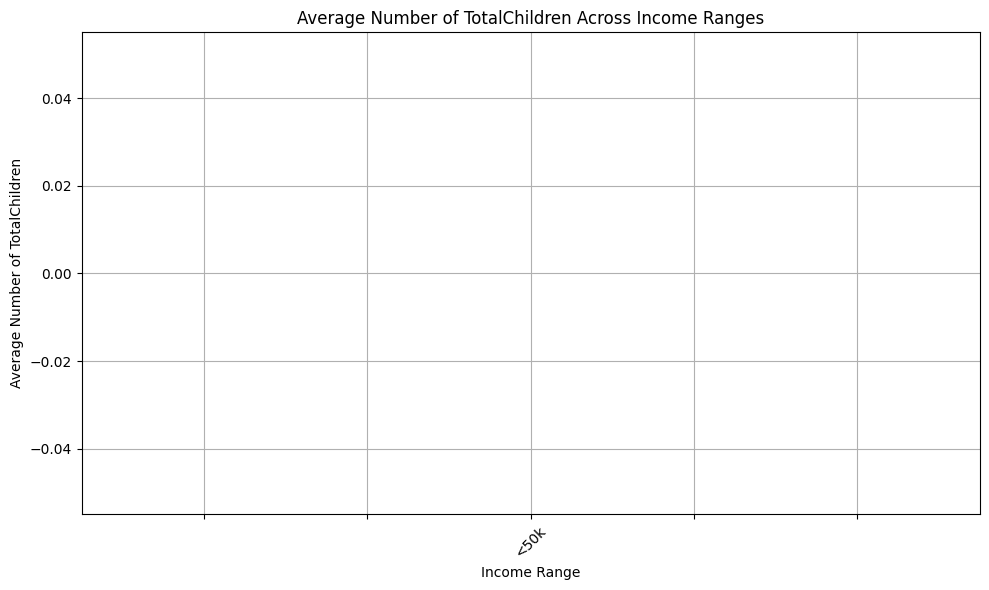

In [59]:
#Plot the averages using a line chart
plt.figure(figsize=(10, 6))
average_children_by_income_range.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Number of TotalChildren Across Income Ranges')
plt.xlabel('Income Range')
plt.ylabel('Average Number of TotalChildren')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

14th Task

In [60]:
#Generate a column chart that illustrates the count of customers by HomeOwner status for each MaritalStatus

# Group the data by both 'HomeOwner' and 'MaritalStatus' columns and count the number of customers in each group
grouped_data = df.groupby(['HomeOwner', 'MaritalStatus']).size().unstack()


<Figure size 1000x600 with 0 Axes>

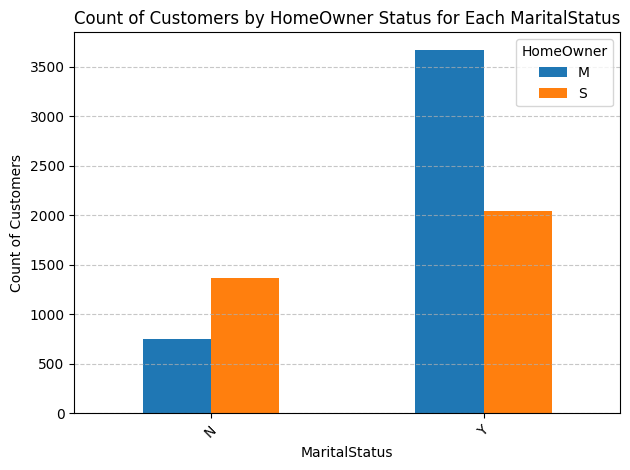

In [61]:
# Plot the counts using a column chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=False)
plt.title('Count of Customers by HomeOwner Status for Each MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='HomeOwner')
plt.tight_layout()
plt.show()

15th Task

In [62]:
#Visualize the distribution of customers' birth months using a bar chart (Extract month from BirthDate).

# Extract the month from the 'BirthDate' column
df['BirthMonth'] = pd.to_datetime(df['BirthDate']).dt.month


In [63]:
# Count the number of customers born in each month
birth_month_counts = df['BirthMonth'].value_counts().sort_index()


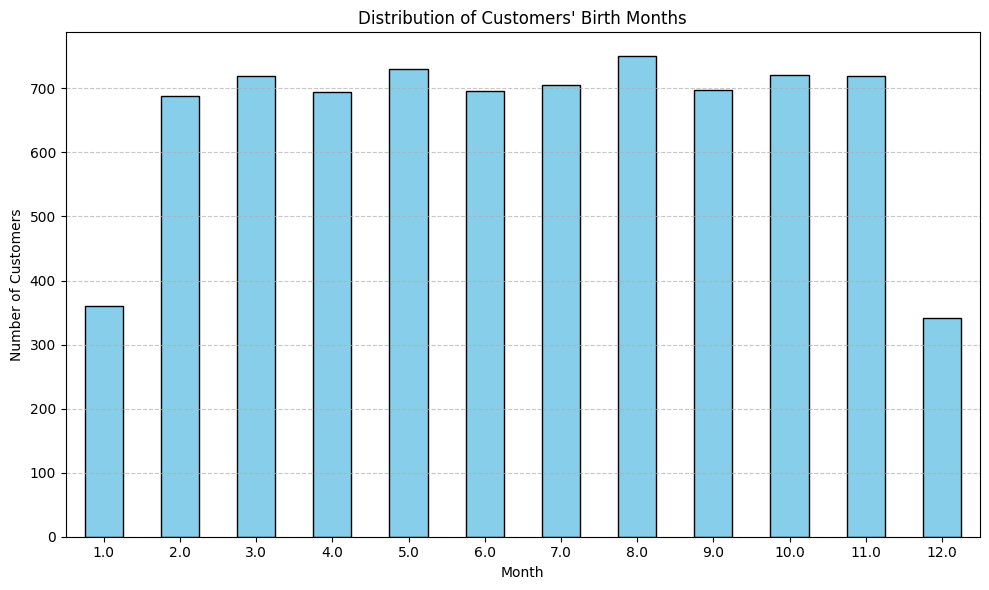

In [64]:
# Plot the counts using a bar chart
plt.figure(figsize=(10, 6))
birth_month_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Customers' Birth Months")
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

16th Task

In [69]:
#Create a pie chart to represent the proportion of customers by Occupation within a specific income range.

# Convert 'AnnualIncome' to numeric format (remove '$' and ',' symbols)
df['AnnualIncome'] = df['AnnualIncome'].replace('[\$,]', '', regex=True).astype(float)


# Define the specific income range
income_range = (50000, 75000)  # Example: income range from $50,000 to $75,000



In [75]:
# Filter the DataFrame for the specific income range
filtered_df = df[(df['AnnualIncome'] >= income_range[0]) & (df['AnnualIncome'] <= income_range[1])]


In [71]:
# Count the number of customers in each Occupation within the filtered DataFrame
occupation_counts = filtered_df['Occupation'].value_counts()


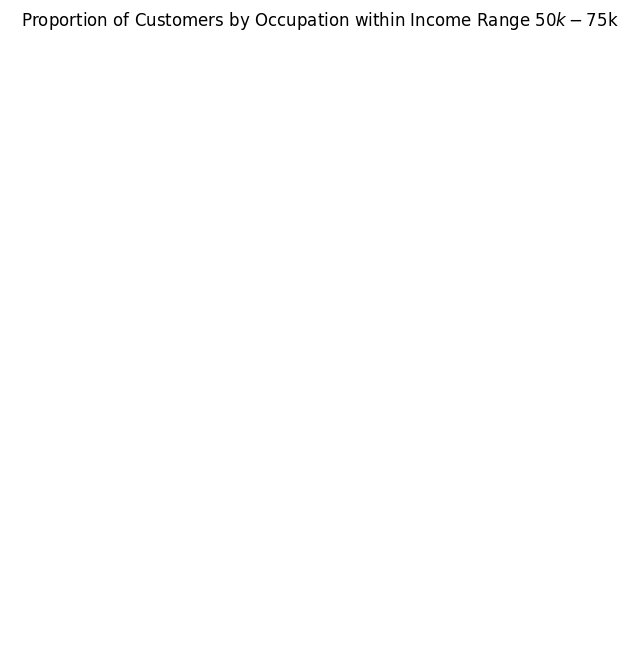

In [72]:
# Plot the counts using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers by Occupation within Income Range $50k-$75k')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

17th Task

In [76]:
#Use a bar chart to show the frequency of each EducationLevel category.


# Count the number of occurrences of each EducationLevel category
education_counts = df['EducationLevel'].value_counts()


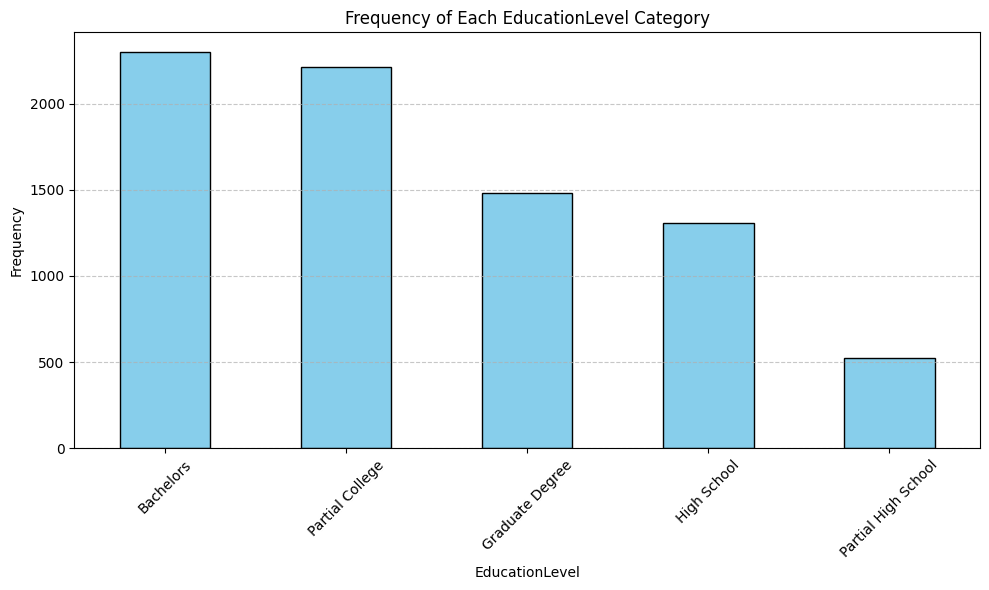

In [77]:
# Plot the counts using a bar chart
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Each EducationLevel Category')
plt.xlabel('EducationLevel')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

THANK YOU MR SAGE